## Prueba CSV

In [1]:
import csv
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from datetime import timedelta, datetime

Se impórta los archivos csv y se leen con read_csv con la libreria pandas, el primer parametro es para la ruta del archivo y el segundo el separador de los datos.

In [2]:
t1 = pd.read_csv('Humedad_Patron.csv',sep = ",")
t2 = pd.read_csv('Humedad_Station.csv',sep = ",")

Se copian los dataset para mantener los archivos originales sin cambios, ademas se dejan los datos lo mas parecidos posible.

In [3]:
t11 = t1.copy()
t22 = t2.copy()

In [4]:
t11.head()

,05/12/17,2:15 p,75
0,05/12/17,2:20 p,75
1,05/12/17,2:25 p,74
2,05/12/17,2:30 p,73
3,05/12/17,2:35 p,73
4,05/12/17,2:40 p,74


In [5]:
t22.head()

,1511906403,58.34
0,1511906405,57.54
1,1511906407,58.18
2,1511906409,58.18
3,1511906412,58.18
4,1511906414,59.13


se convierte la fecha y hora de t11 para que quede en un solo dato

In [6]:
t11['Hour_24']=t11['2:15 p']
n_h_l = []
for index, row in t11.iterrows():
    if row["2:15 p"][-1] =='p':
        if row["2:15 p"][1] == ':':
            n_h_l.append(str(int(row["Hour_24"][0])+12)+row["Hour_24"][1:-2]+":00")
        elif row["2:15 p"][2] == ':':
            if row["Hour_24"][0:2] != '12':
                n_h_l.append(str(int(row["Hour_24"][0:2])+12)+row["Hour_24"][2:-2]+":00")
            else:
                n_h_l.append(row["Hour_24"][:-2]+":00")
    else:
        n_h_l.append(row["Hour_24"][:-2]+":00")

t11.update(pd.DataFrame({'Hour_24': n_h_l}))
t_l = []
for index, row in t11.iterrows():
    t_l.append(datetime.strptime(row['05/12/17']+' ' + row['Hour_24'], '%d/%m/%y %H:%M:%S'))
t11['Time'] = t_l
t11.head()

,05/12/17,2:15 p,75,Hour_24,Time
0,05/12/17,2:20 p,75,14:20:00,2017-12-05 14:20:00
1,05/12/17,2:25 p,74,14:25:00,2017-12-05 14:25:00
2,05/12/17,2:30 p,73,14:30:00,2017-12-05 14:30:00
3,05/12/17,2:35 p,73,14:35:00,2017-12-05 14:35:00
4,05/12/17,2:40 p,74,14:40:00,2017-12-05 14:40:00


se convierte el tiempo en segundos para el dataset 2 y poderlos conparar con el dataset 1.

In [7]:
t22['DateTime']=pd.to_datetime(t22['1511906403'], unit='s')
t22.head()

,1511906403,58.34,DateTime
0,1511906405,57.54,2017-11-28 22:00:05
1,1511906407,58.18,2017-11-28 22:00:07
2,1511906409,58.18,2017-11-28 22:00:09
3,1511906412,58.18,2017-11-28 22:00:12
4,1511906414,59.13,2017-11-28 22:00:14


In [8]:
d_l=[]
d_u_l=[]
H_l=[]
count=1
humidity_prom = 0
for index,row in t22.iterrows():
    if count == 1:
        d_l.append(row['DateTime'])
        d_u_l.append(row['1511906403'])
    
    humidity_prom = humidity_prom + row['58.34']
    
    
    if count == 147:
        count = 1
        H_l.append(humidity_prom/147)
        humidity_prom = 0
    else:
        count+=1
t222 = pd.DataFrame({'Time': d_u_l[:-1],'DateTime': d_l[:-1],'Humidity':H_l})
t222.head()

,Time,DateTime,Humidity
0,1511906405,2017-11-28 22:00:05,61.171769
1,1511906735,2017-11-28 22:05:35,61.337415
2,1511907065,2017-11-28 22:11:05,62.618163
3,1511907395,2017-11-28 22:16:35,62.169524
4,1511907725,2017-11-28 22:22:05,63.048571


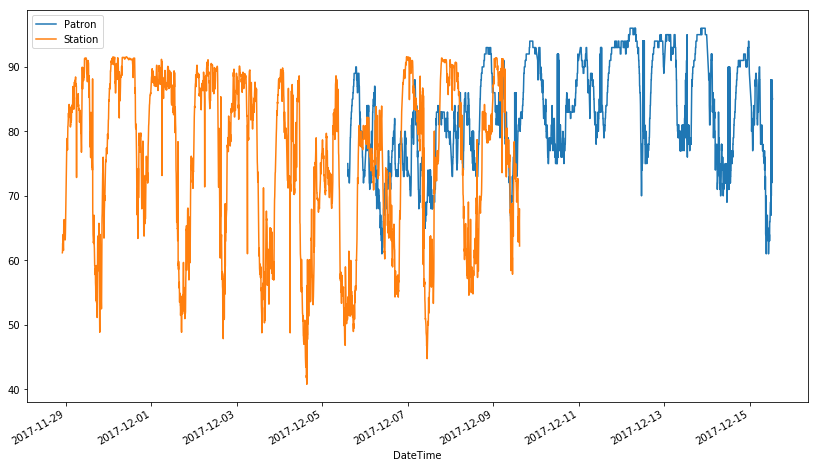

In [9]:
ax = t11.plot(x="Time", y="75",label="Patron")
t222.plot(figsize=(14, 8),ax=ax,x="DateTime", y="Humidity",label="Station")

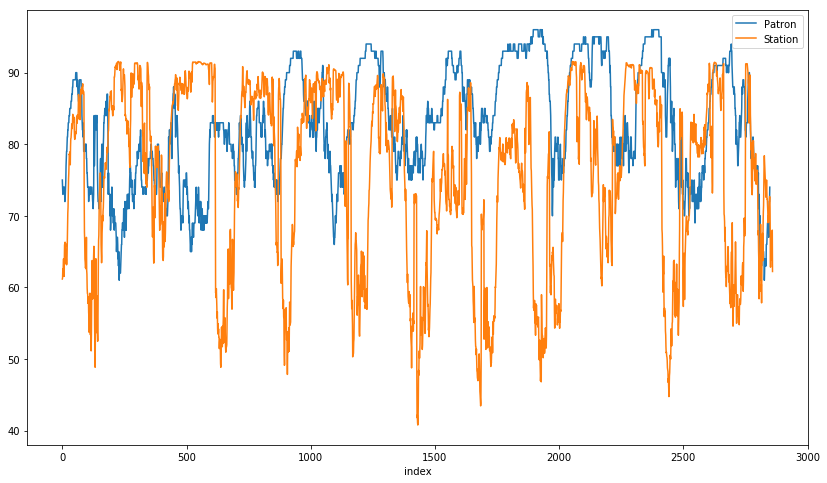

In [10]:
t11
ax = t11.reset_index().plot(x="index", y="75",label="Patron")
t222.reset_index().plot(figsize=(14, 8),ax=ax,x="index", y="Humidity",label="Station")

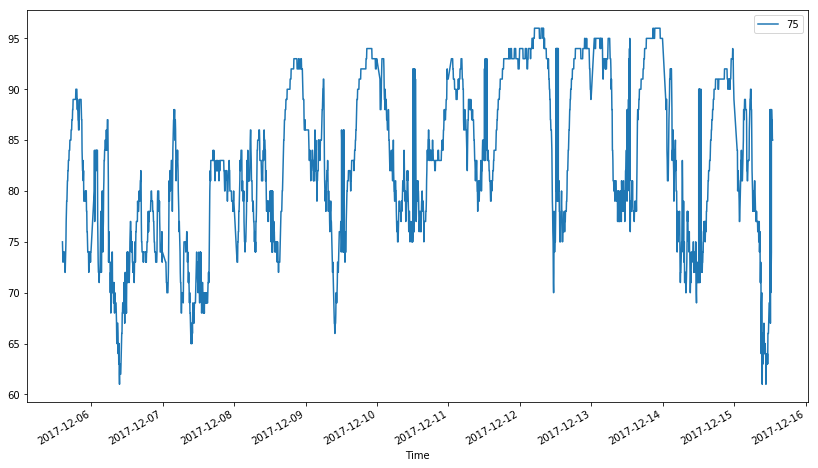

In [11]:
t11.plot(figsize=(14, 8),x="Time", y="75")

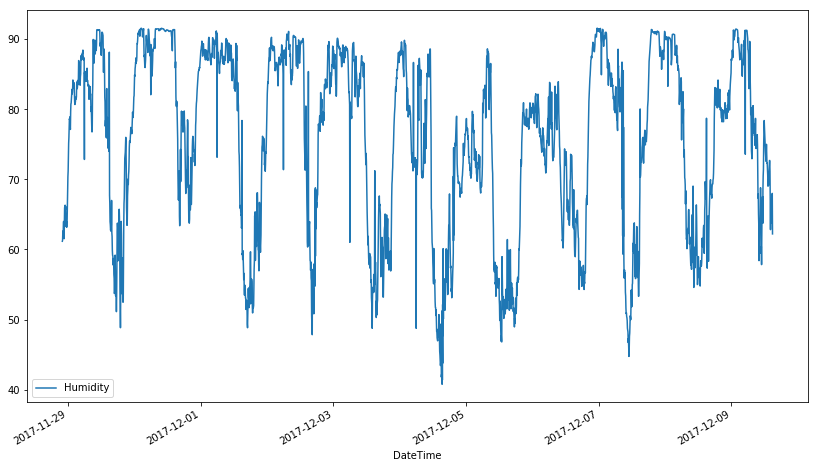

In [12]:
t222.plot(figsize=(14, 8),x="DateTime", y="Humidity")

In [13]:
len(t11)

2849

In [14]:
len(t222)

2860

In [15]:
t11["UnixTime"] = (t11["Time"] - datetime(1970, 1, 1)) / timedelta(seconds=1)
t11.head()

,05/12/17,2:15 p,75,Hour_24,Time,UnixTime
0,05/12/17,2:20 p,75,14:20:00,2017-12-05 14:20:00,1.512484e+09
1,05/12/17,2:25 p,74,14:25:00,2017-12-05 14:25:00,1.512484e+09
2,05/12/17,2:30 p,73,14:30:00,2017-12-05 14:30:00,1.512484e+09
3,05/12/17,2:35 p,73,14:35:00,2017-12-05 14:35:00,1.512484e+09
4,05/12/17,2:40 p,74,14:40:00,2017-12-05 14:40:00,1.512485e+09


In [16]:
suma = 0
suma_out = 0
for i in range(2849):
    distancia_punto_i = (t11.iloc[i]["75"] - t222.iloc[i]["Humidity"])**2 + (t11.iloc[i]["UnixTime"] - t222.iloc[i]["Time"])**2
    suma = suma + distancia_punto_i

print("Suma distancias")
print(suma)
print("Raiz suma distancias")
print(math.sqrt(suma))
print("Promedio distancia")
print(math.sqrt(suma)/2850)

Suma distancias
857561839935360.1
Raiz suma distancias
29284156.807655573
Promedio distancia
10275.142739528272


In [17]:
h1 = pd.DataFrame({'A': t11["75"].values,'B': t11.reset_index()["index"].values})
h2 = pd.DataFrame({'A': t222["Humidity"][:2849].values,'B': t222.reset_index()["index"][:2849].values})

print("Distancia Euclideana de A hasta B")
print(np.linalg.norm(h1-h2))
print("Distancia Euclideana de A hasta B Manual")
print(math.sqrt(np.sum(np.sum((h1-h2)**2,axis=1))))
print("Distancia Euclideana Máxima de A hasta B por puntos")
print(math.sqrt(max(np.sum((h1-h2)**2,axis=1))))

Distancia Euclideana de A hasta B
912.1238428005831
Distancia Euclideana de A hasta B Manual
912.1238428005832
Distancia Euclideana Máxima de A hasta B por puntos
49.18265306122447
